In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
from google.colab import files
uploaded = files.upload()


KeyboardInterrupt: ignored

In [ ]:
from google.colab import files
uploaded = files.upload()

In [44]:
import zipfile
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/archive')


In [81]:
data = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')
data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [82]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97225 entries, 0 to 97224
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            97225 non-null  int64  
 1   type            97225 non-null  object 
 2   amount          97225 non-null  float64
 3   nameOrig        97225 non-null  object 
 4   oldbalanceOrg   97225 non-null  float64
 5   newbalanceOrig  97225 non-null  float64
 6   nameDest        97225 non-null  object 
 7   oldbalanceDest  97225 non-null  float64
 8   newbalanceDest  97224 non-null  float64
 9   isFraud         97224 non-null  float64
 10  isFlaggedFraud  97224 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 8.2+ MB


In [83]:
data.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,97225.000000,9.722500e+04,9.722500e+04,9.722500e+04,9.722500e+04,9.722400e+04,97224.000000,97224.0
mean,8.456817,1.724217e+05,8.793150e+05,8.956148e+05,8.792683e+05,1.182315e+06,0.001173,0.0
std,1.833480,3.419651e+05,2.689865e+06,2.727826e+06,2.403354e+06,2.802840e+06,0.034223,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,9.893120e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,5.208135e+04,1.994700e+04,0.000000e+00,2.080800e+04,4.894480e+04,0.000000,0.0
75%,10.000000,2.103607e+05,1.863453e+05,2.107046e+05,5.853365e+05,1.051531e+06,0.000000,0.0
max,10.000000,1.000000e+07,3.379739e+07,3.400874e+07,3.400874e+07,3.397234e+07,1.000000,0.0


In [84]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))


Categorical variables: 3
Integer variables: 1
Float variables: 7


<Axes: xlabel='type', ylabel='count'>

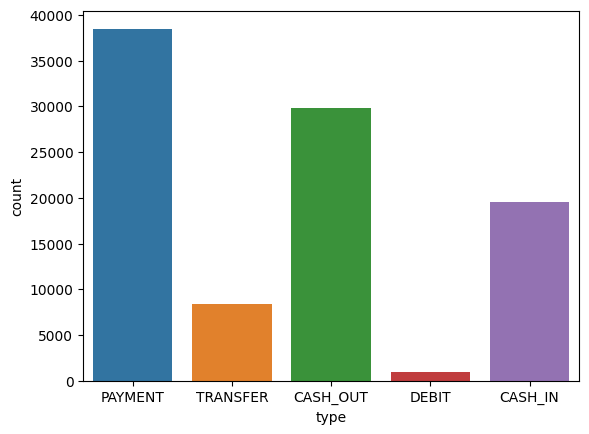

In [85]:
sns.countplot(x='type', data=data)


<Axes: xlabel='type', ylabel='amount'>

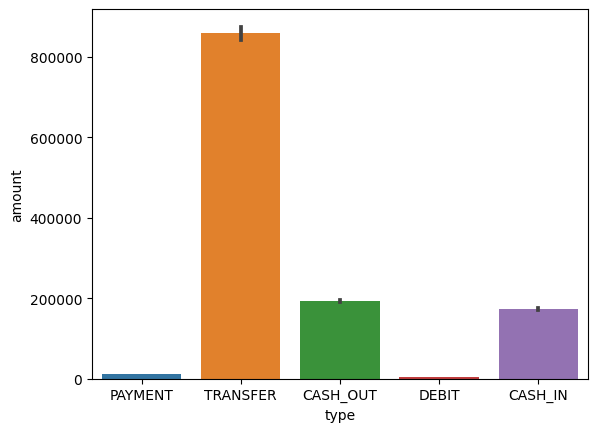

In [86]:
sns.barplot(x='type', y='amount', data=data)


In [87]:
data['isFraud'].value_counts()


0.0    97110
1.0      114
Name: isFraud, dtype: int64

<ipython-input-88-d1bba932735e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['step'], bins=50)


<Axes: xlabel='step', ylabel='Density'>

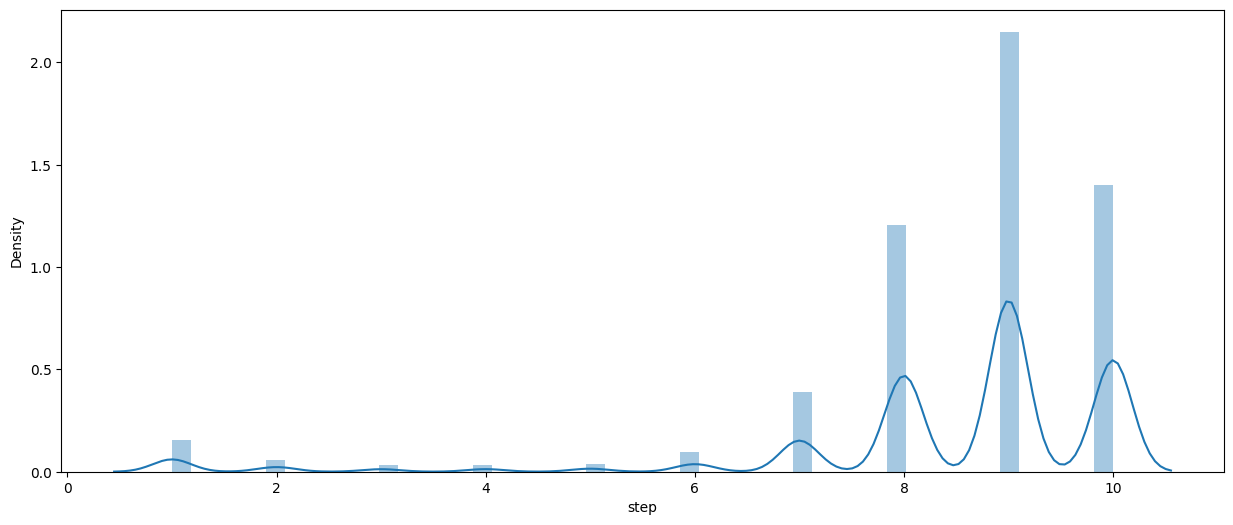

In [88]:
plt.figure(figsize=(15, 6))
sns.distplot(data['step'], bins=50)


<ipython-input-89-b69deaa7993a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),


<Axes: >

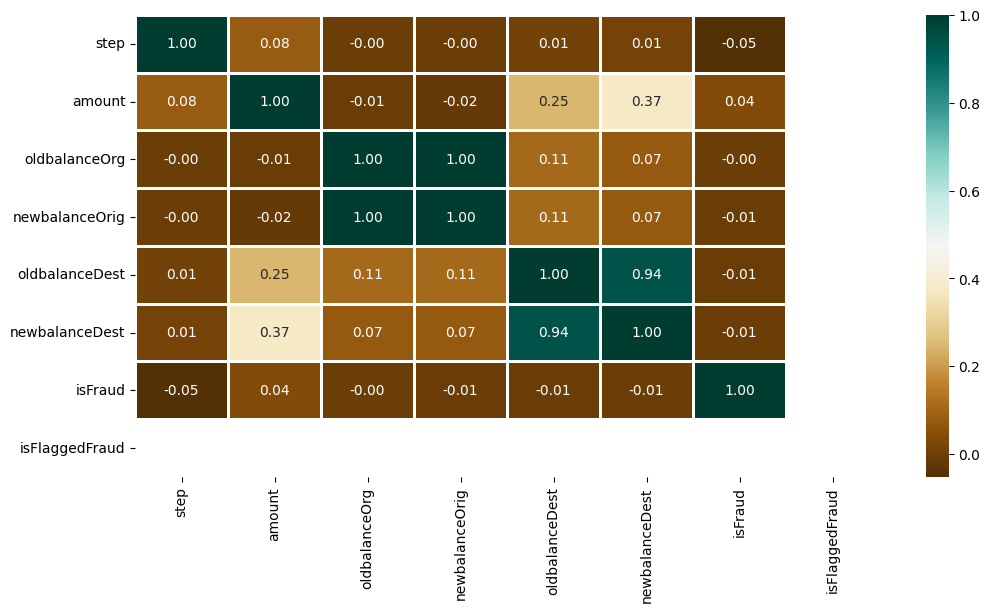

In [89]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(),
			cmap='BrBG',
			fmt='.2f',
			linewidths=2,
			annot=True)


In [90]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,0,0,1,0


In [91]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']


In [92]:
X.shape, y.shape


((97225, 11), (97225,))

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.3, random_state=42)


In [94]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [95]:
models = [LogisticRegression(), XGBClassifier(),
		SVC(kernel='rbf', probability=True),
		RandomForestClassifier(n_estimators=7,
								criterion='entropy',
								random_state=7)]

for i in range(len(models)):
	models[i].fit(X_train, y_train)
	print(f'{models[i]} : ')

	train_preds = models[i].predict_proba(X_train)[:, 1]
	print('Training Accuracy : ', ras(y_train, train_preds))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  options={"iprint": iprint, "gtol": tol, "maxiter": max_iter},


LogisticRegression() : 
Training Accuracy :  0.9412209029475906
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
SVC(probability=True) : 
Training Accuracy :  0.9222025711325856
RandomForestClassifier(criterion='entropy', n_estimators=7, random_state=7) : 
Traini

In [97]:
X_test['newbalanceDest'] = X_test['newbalanceDest'].fillna(X_test['newbalanceDest'].mean())
X_test['isFlaggedFraud'] = X_test['isFlaggedFraud'].fillna(X_test['isFlaggedFraud'].mean())

In [98]:
X_test.isnull().sum()

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFlaggedFraud    0
CASH_OUT          0
DEBIT             0
PAYMENT           0
TRANSFER          0
dtype: int64

In [ ]:
models = [LogisticRegression(), XGBClassifier(),
          SVC(kernel='rbf', probability=True),
          RandomForestClassifier(n_estimators=7,
                                 criterion='entropy',
                                 random_state=7)]

for i in range(len(models)):
    models[i].fit(X_train, y_train)
    print(f'{models[i]} : ')

    train_preds = models[i].predict_proba(X_train)[:, 1]
    print('Training Accuracy : ', ras(y_train, train_preds))

    y_preds = models[i].predict_proba(X_test)[:, 1]
    print( ras(y_test, y_preds))
    print()

In [ ]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n",cnf_matrix)